# **Identifying Good System Administrators**

Questrom & Company (QC), a consulting firm specialized in information systems, is studying the roles played by **experience** and **training** in a system administrator’s ability to **complete a set of tasks in a specified amount of time**. In particular, the firm needs to be able to discriminate between administrators who usually are able to complete given tasks within a specified time and those who are not. Data are collected on the performance of 75 randomly selected administrators. They are stored in the file _SystemAdministrators.csv_.

The variable **'experience'** measures months of full-time system administrator experience, while **'training'** measures the number of relevant training credits. The outcome variable **'completed task'** is either Yes or No, according to whether or not the administrator completed the tasks.

# Environment Setup

In [21]:
# import required packages
%matplotlib inline
import matplotlib.pylab as plt
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *

In [22]:
# connect to Google Drive and load the data
# from google.colab import drive
# drive.mount('/content/drive')
admin_df = pd.read_csv('../data/SystemAdministrators.csv')
admin_df.info()
admin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Experience      75 non-null     float64
 1   Training        75 non-null     int64  
 2   Completed task  75 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


## Preprocessing

In [23]:
# standardize the variable names
admin_df.columns = [c.replace(' ', '_') for c in admin_df.columns]

# Convert yes/no into 1/0
admin_df.Completed_task.replace(('Yes', 'No'), (1, 0), inplace=True)

admin_df.head()

,Experience,Training,Completed_task
0,10.9,4,1
1,9.9,4,1
2,10.4,6,1
3,13.7,6,1
4,9.4,8,1


## Visualization

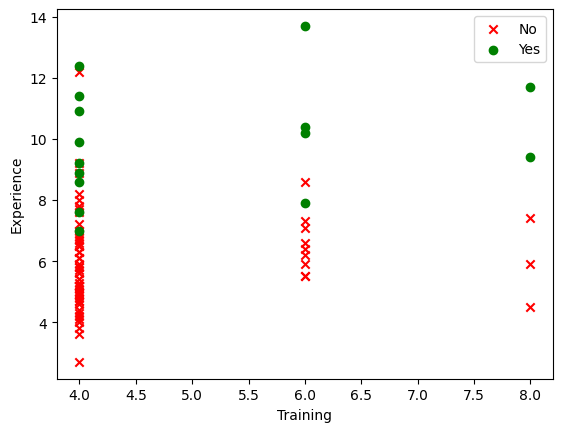

In [24]:
# create a scatter plot of Experience vs. Training
# keep track of the outcome (1 or 0) using colors
fig, ax = plt.subplots()

subset0 = admin_df.loc[admin_df['Completed_task']== 0]
ax.scatter(subset0.Training, subset0.Experience, marker='x', label='No', color='red')

subset1 = admin_df.loc[admin_df['Completed_task']== 1]
ax.scatter(subset1.Training, subset1.Experience, marker='o', label='Yes', color='green')

plt.xlabel('Training')  # set x-axis label
plt.ylabel('Experience')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

From the scatterplot we can observe that programmers who completed the task tend to have more experience. Training, however, does not seem to play much a role in task completion. Therefore, the predictor Experience appears more useful for classifying task completion. Nonetheless, we'll explore both.

In [25]:
# Define categorical variable (not strictly needed but good practice)
admin_df['Completed_task'] = admin_df['Completed_task'].astype('category')

# Define X and y
y = admin_df['Completed_task']
X = admin_df.drop(columns=['Completed_task'])

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)

### Side remark, what does 'stratify' option do? Answer: it ensures the number of "1's" and "0's" in training and testing sets are "balanced".

In [27]:
# Stratify off:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = None)
print( "Number of 1's in training set:", sum(y_train))
print( "Number of 1's in testing set:", sum(y_test))
print( "Proportion of 1's in testing set", sum(y_test)/(sum(y_train)+sum(y_test)))

Number of 1's in training set: 13
Number of 1's in testing set: 2
Proportion of 1's in testing set 0.13333333333333333


In [28]:
# Stratify on:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
print( "Number of 1's in training set:", sum(y_train))
print( "Number of 1's in testing set:", sum(y_test))
print( "Proportion of 1's in testing set", sum(y_test)/(sum(y_train)+sum(y_test)))

Number of 1's in training set: 9
Number of 1's in testing set: 6
Proportion of 1's in testing set 0.4


## Run Logistic Regression Model

In [29]:
# Logistic Regression
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train, y_train)

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [30]:
# Make predictions on test data
y_pred = lr.predict(X_test)

In [31]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[24,  0],
       [ 2,  4]])

In [32]:
# accuracy score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [33]:
# What if we want to change the default probability cutoff of 0.5?

# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(X_test)[:,1]
np.round(p_pred,3)

array([0.004, 0.008, 0.479, 0.001, 0.392, 0.009, 0.997, 0.064, 0.006,
       0.018, 0.002, 0.016, 0.029, 0.925, 0.045, 0.011, 0.057, 0.051,
       0.014, 0.873, 0.002, 0.032, 0.122, 0.   , 0.01 , 0.046, 0.872,
       0.002, 0.121, 0.01 ])

In [34]:
# Define new cutoff
cutoff = 0.25
y_pred_new=[1 if i > cutoff else 0 for i in p_pred]
y_pred_new

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [35]:
# confusion matrix with different cutoff
confusion_matrix(y_test,y_pred_new)

array([[22,  2],
       [ 2,  4]])

In [36]:
# accuracy score with different cutoff
accuracy_score(y_test, y_pred_new)

0.8666666666666667

## Interpreting results

In [37]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X.columns))

intercept  -12.14404568619654
               coeff
Experience  1.182772
Training    0.294407


In [38]:
# print exponentiated Experience and Training coefficients
print( math.exp(lr_coef[0]) )
print( math.exp(lr_coef[1]) )

3.26340683778162
1.342330032556631


A positive coefficient in the logit model translates into a coefficient larger than 1 in the odds model. In the logit model, the estimated coefficient for Experience is 1.18. In the odds model, the coefficient is e^1.18 = 3.26. This means that an increase of a unit in Experience is associated with an increase in the odds of completing the task on time by a factor of 3.26. Conversely, and extra unit of Training only increases the odds of completing a task by a factor of 1.34.

In [39]:
# consider a new administrator with 9 months of Experience and 6 credits of Training
na_exp = 9
na_train = 6

# find associated logit of finishing a task on time
logit = lr_int + lr_coef[0] * na_exp + lr_coef[1] * na_train
print("logit: ", logit)

# find associated odds of finishing a task on time
odds = math.exp(logit)
print("odds: ", odds)

# find associated probability of finishing a task on time
prob = odds/(1+odds)
print("prob: ", prob)

logit:  0.26734114678375187
odds:  1.3064860738362432
prob:  0.5664400442978792


In [40]:
# What if we increase experience by 1 month to 10?
# We know that odds will increase by factor of 3.26, so we should get
# new odds of 1.306*3.26 ~ 4.26. Let's check!

na_exp = 10
na_train = 6

# find associated logit of finishing a task on time
logit = lr_int + lr_coef[0] * na_exp + lr_coef[1] * na_train
print("logit: ", logit)

# find associated odds of finishing a task on time
odds = math.exp(logit)
print("odds: ", odds)

# find associated probability of finishing a task on time
prob = odds/(1+odds)
print("prob: ", prob)

logit:  1.450112838750139
odds:  4.26359558682366
prob:  0.8100157993704349


## Bonus: Logistic Regression with statistics package

In [41]:
# import statspackage
import statsmodels.api as sm

# note: statsmodels is missing the constant term in the sigmoid, 
# so we need to add it back...
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

logit_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(logit_reg.params)
print(logit_reg.summary())

Optimization terminated successfully.
         Current function value: 0.247065
         Iterations 8
const        -12.143936
Experience     1.182758
Training       0.294407
dtype: float64
                           Logit Regression Results                           
Dep. Variable:         Completed_task   No. Observations:                   45
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            2
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                  0.5063
Time:                        15:21:52   Log-Likelihood:                -11.118
converged:                       True   LL-Null:                       -22.518
Covariance Type:            nonrobust   LLR p-value:                 1.119e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1439